In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import statsmodels.api as sm
from scipy.special import inv_boxcox
from scipy.stats import boxcox, pearsonr, shapiro 
import scipy.stats as stats                 
from statsmodels.stats.diagnostic import het_breuschpagan 
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)

In [3]:
data = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [5]:
df = df.drop(["car_name"], axis=1)

In [6]:
df = df.drop(["origin"], axis=1)

In [7]:
df.dropna(inplace=True)

In [8]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [11]:
df_train = pd.concat([X_train, y_train], axis=1)

In [12]:
df_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
6,8,454.0,220.0,4354.0,9.0,70,14.0
294,4,86.0,65.0,1975.0,15.2,79,34.1
122,4,121.0,110.0,2660.0,14.0,73,24.0
172,4,90.0,71.0,2223.0,16.5,75,25.0
108,4,97.0,88.0,2279.0,19.0,73,20.0


In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,313.0,5.440895,1.708910,3.0,4.0,4.0,8.0,8.0
displacement,313.0,192.551118,104.656615,68.0,98.0,144.0,262.0,455.0
horsepower,313.0,102.830671,38.543100,46.0,75.0,90.0,120.0,230.0
weight,313.0,2962.613419,855.319475,1613.0,2210.0,2774.0,3620.0,5140.0
acceleration,313.0,15.666134,2.823006,8.5,13.8,15.5,17.4,24.8
model_year,313.0,75.996805,3.687729,70.0,73.0,76.0,79.0,82.0
mpg,313.0,23.622364,7.806051,9.0,17.5,23.0,29.9,46.6


In [14]:
alpha = 0.05

In [15]:
for i in range(X_train.shape[1]):
    correlation, p_value = pearsonr(X_train.iloc[:, i], y_train)
    print(f"{X_train.columns[i]}:")
    print(f"  Pearson Korelasyon Katsayısı: {correlation:.2f}")
    print(f"  P-değeri: {p_value:.4f}")
    if p_value < alpha:
        print("  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.\n")
    else:
        print("  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlı değildir.\n")

cylinders:
  Pearson Korelasyon Katsayısı: -0.78
  P-değeri: 0.0000
  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.

displacement:
  Pearson Korelasyon Katsayısı: -0.82
  P-değeri: 0.0000
  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.

horsepower:
  Pearson Korelasyon Katsayısı: -0.78
  P-değeri: 0.0000
  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.

weight:
  Pearson Korelasyon Katsayısı: -0.84
  P-değeri: 0.0000
  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.

acceleration:
  Pearson Korelasyon Katsayısı: 0.41
  P-değeri: 0.0000
  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.

model_year:
  Pearson Korelasyon Katsayısı: 0.59
  P-değeri: 0.0000
  Bu değişken ile bağımlı değişken arasındaki korelasyon istatistiksel olarak anlamlıdır.



In [16]:
corr_matrix = df_train.corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
cylinders,1.000000,0.951213,0.849393,0.897198,-0.494513,-0.358331,-0.781370
displacement,0.951213,1.000000,0.902098,0.939658,-0.528263,-0.381626,-0.816285
horsepower,0.849393,0.902098,1.000000,0.876194,-0.678569,-0.433656,-0.778918
weight,0.897198,0.939658,0.876194,1.000000,-0.403957,-0.319754,-0.835811
acceleration,-0.494513,-0.528263,-0.678569,-0.403957,1.000000,0.284928,0.409544
model_year,-0.358331,-0.381626,-0.433656,-0.319754,0.284928,1.000000,0.593550
mpg,-0.781370,-0.816285,-0.778918,-0.835811,0.409544,0.593550,1.000000


In [17]:
correlations_sorted = corr_matrix["mpg"].drop("mpg").sort_values(ascending=False)
print(correlations_sorted)

model_year      0.593550
acceleration    0.409544
horsepower     -0.778918
cylinders      -0.781370
displacement   -0.816285
weight         -0.835811
Name: mpg, dtype: float64


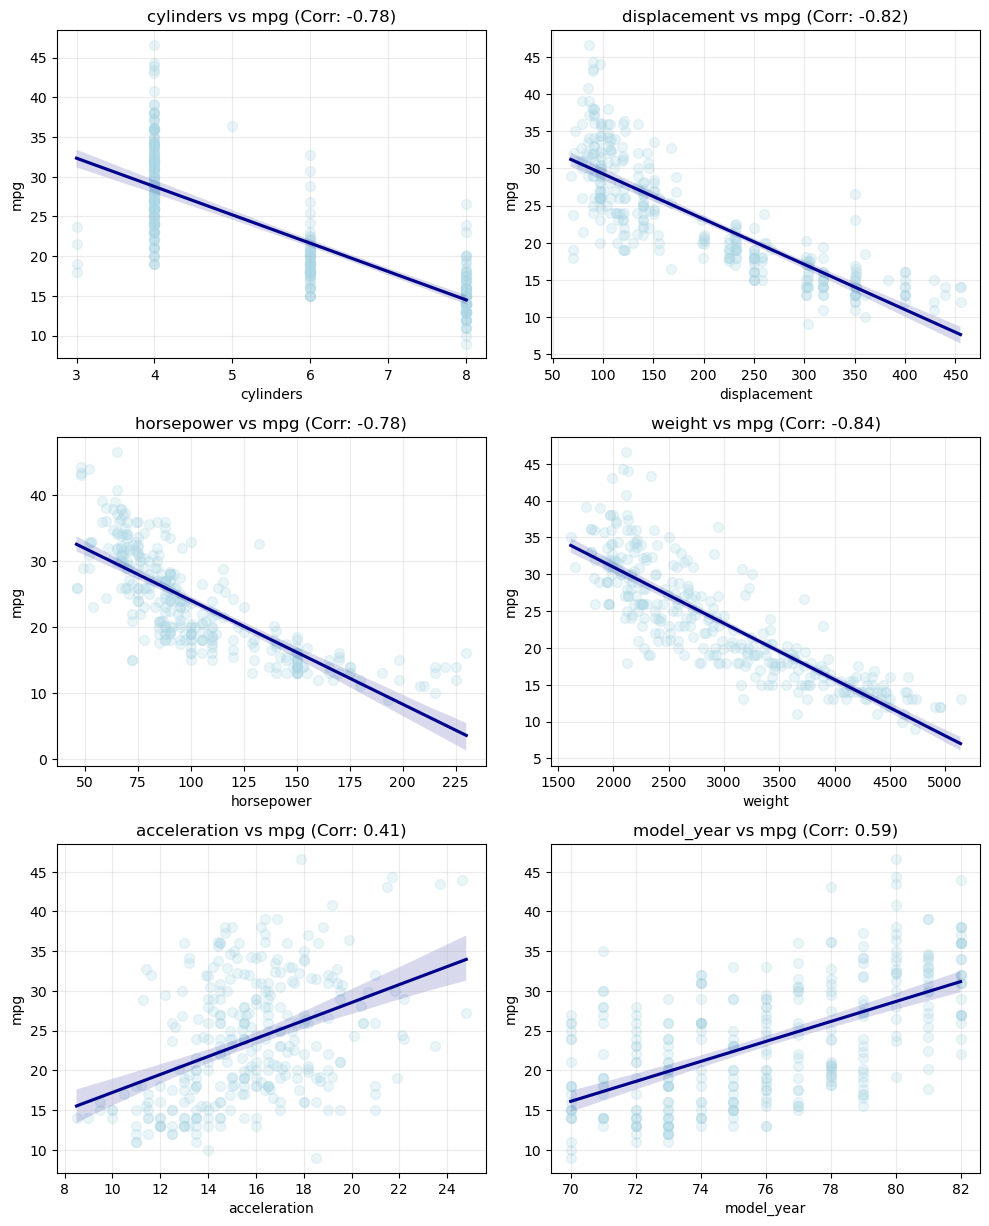

In [18]:
correlations = df_train.corr()["mpg"].drop("mpg")
variables = correlations.index

plt.figure(figsize=(10, 16))

for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    sns.regplot(
        x=df_train[var], 
        y=df_train["mpg"],
        ci=95,
        scatter_kws={"color": "lightblue", "s": 50, "alpha": 0.25},
        line_kws={"color": "darkblue"}
    )
    plt.grid(True, alpha = 0.25)
    plt.xlabel(var)
    plt.ylabel("mpg")
    plt.title(f"{var} vs mpg (Corr: {correlations[var]:.2f})")

plt.tight_layout()
plt.show()

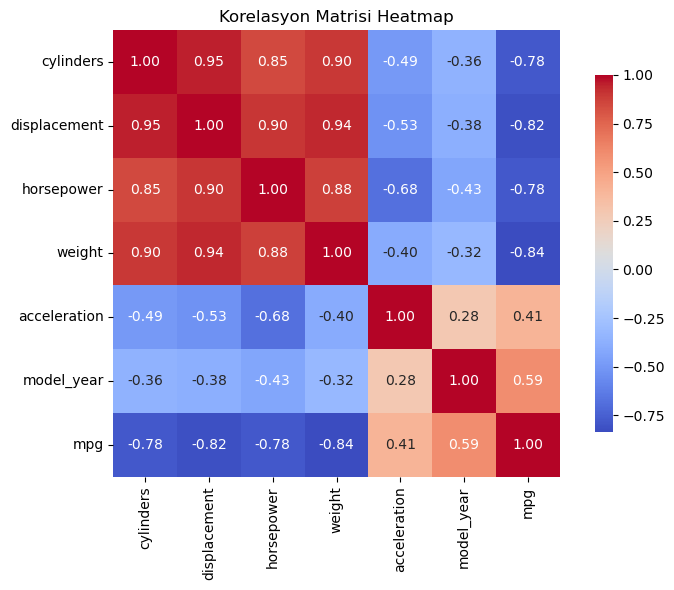

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Korelasyon Matrisi Heatmap")
plt.tight_layout()
plt.show()

In [20]:
X_train_weight= X_train["weight"]

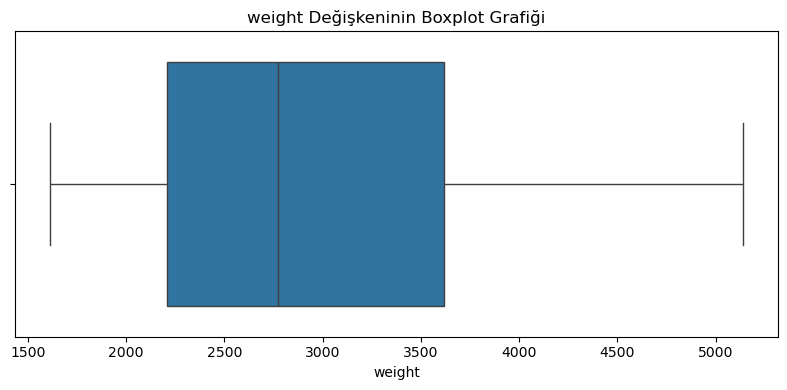

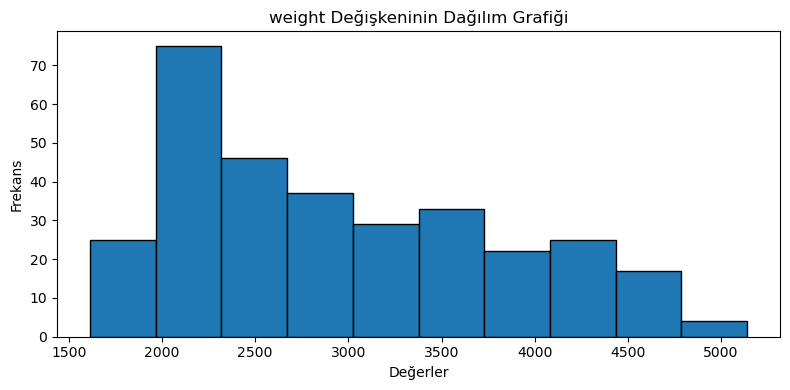

In [21]:
def plot_variable_distribution(series, var_name=None, plot_box=True, plot_hist=True, grid=False):
    if var_name is None:
        var_name = series.name if series.name is not None else "Değişken"

    if plot_box:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=series)
        plt.title(f"{var_name} Değişkeninin Boxplot Grafiği")
        plt.grid(grid)
        plt.tight_layout()
        plt.show()
        print("\n")

    if plot_hist:
        plt.figure(figsize=(8, 4))
        bins = math.ceil(np.log2(len(series)) + 1)
        plt.hist(series, bins=bins, edgecolor='k')
        plt.title(f"{var_name} Değişkeninin Dağılım Grafiği")
        plt.xlabel("Değerler")
        plt.ylabel("Frekans")
        plt.grid(grid)
        plt.tight_layout()
        plt.show()
        print("\n")
    
plot_variable_distribution(X_train_weight, var_name="weight")

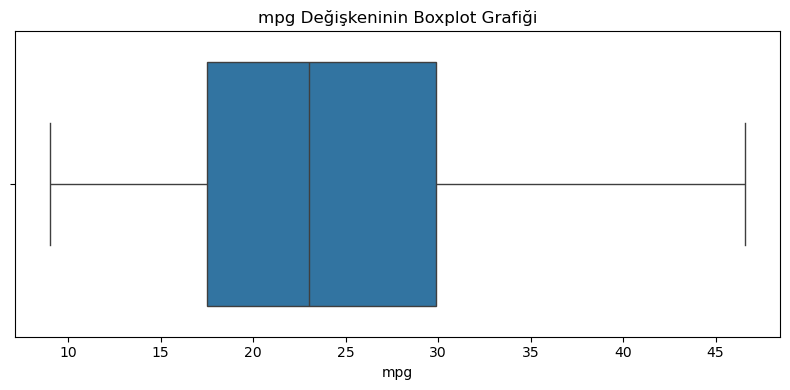

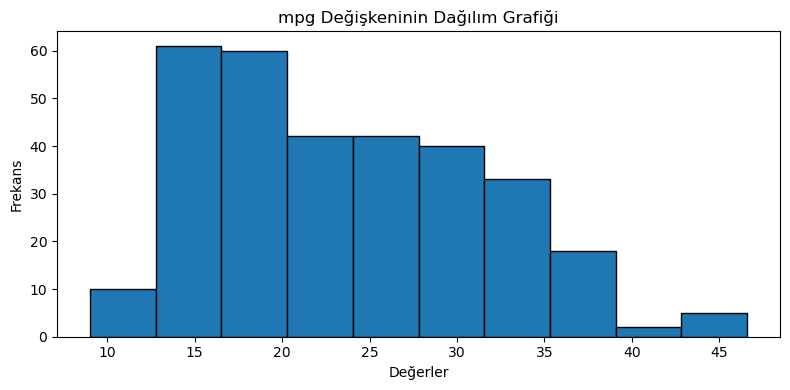

In [22]:
plot_variable_distribution(y_train, var_name="mpg")

In [23]:
Q1 = X_train_weight.quantile(0.25)
Q3 = X_train_weight.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [24]:
upper_outliers = X_train_weight.loc[X_train_weight > upper_bound].count()
print(f"Üst sınır üzerindeki aykırı değer sayısı: {upper_outliers}")

Üst sınır üzerindeki aykırı değer sayısı: 0


In [25]:
lower_outliers = X_train_weight.loc[X_train_weight < lower_bound].count()
print(f"Alt sınır altındaki aykırı değer sayısı: {lower_outliers}")

Alt sınır altındaki aykırı değer sayısı: 0


In [26]:
X_train_const = sm.add_constant(X_train_weight)
model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     720.8
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           5.54e-83
Time:                        00:16:09   Log-Likelihood:                -899.13
No. Observations:                 313   AIC:                             1802.
Df Residuals:                     311   BIC:                             1810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2212      0.876     52.763      0.000      44.498      47.945
weight        -0.0076      0.000    -26.847      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       29.271   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.469
Skew:                           0.639   Prob(JB):                     9.89e-10
Kurtosis:                       4.243   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
intercept = model.params['const']
slope = model.params['weight']

In [28]:
fitted_values = model.fittedvalues
residuals = model.resid

In [29]:
train_mae = mean_absolute_error(y_train, (fitted_values))
print(train_mae)

3.2296198706342834


In [30]:
def perform_and_print_assumption_tests(residuals, exog):
    shapiro_stat, shapiro_p = shapiro(residuals)
    print(f"\nShapiro-Wilk Testi: W İstatistiği = {shapiro_stat:.2f}, p değeri = {shapiro_p:.5f}")
    if shapiro_p < alpha:
        print("İstatistiksel olarak, artıkların normal dağıldığı anlamlı bir şekilde söylenemez.")
    else:
        print("İstatistiksel olarak, artıkların normal dağıldığı anlamlı bir şekilde söylenebilir.")

    bp_stat, bp_p, _, _ = het_breuschpagan(residuals, exog)
    print(f"\nBreusch-Pagan Testi: p değeri = {bp_p:.5f}")
    if bp_p < alpha:
        print("İstatistiksel olarak, artıkların sabit varyansa sahip olduğu anlamlı bir şekilde söylenemez.")
    else:
        print("İstatistiksel olarak, artıkların sabit varyansa sahip olduğu anlamlı bir şekilde söylenebilir.")

perform_and_print_assumption_tests(residuals, X_train_const)


Shapiro-Wilk Testi: W İstatistiği = 0.97, p değeri = 0.00002
İstatistiksel olarak, artıkların normal dağıldığı anlamlı bir şekilde söylenemez.

Breusch-Pagan Testi: p değeri = 0.00003
İstatistiksel olarak, artıkların sabit varyansa sahip olduğu anlamlı bir şekilde söylenemez.


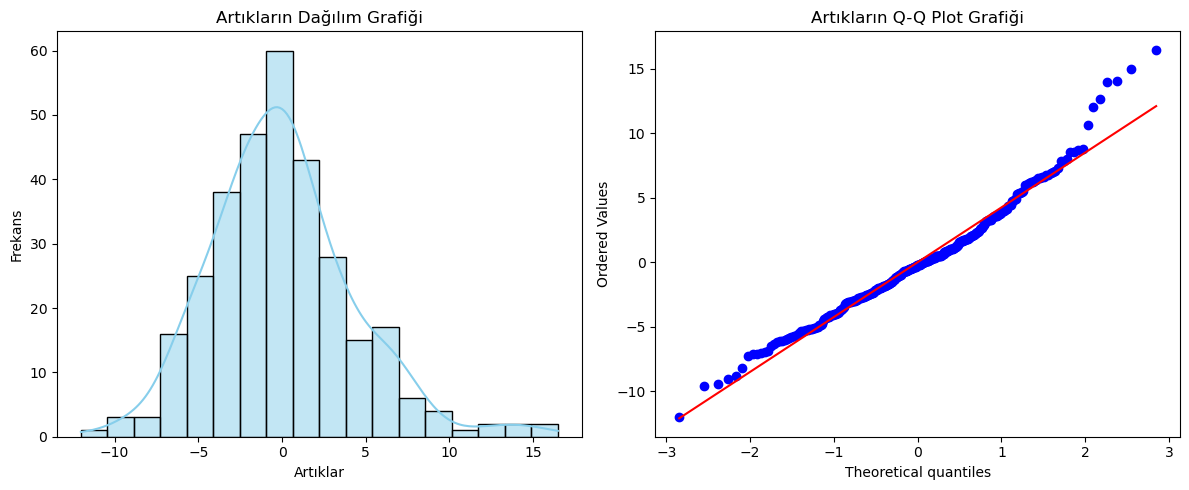

In [31]:
def plot_residuals(residuals):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, bins=math.ceil(math.sqrt(len(residuals))), color='skyblue')
    plt.title("Artıkların Dağılım Grafiği")
    plt.xlabel("Artıklar")
    plt.ylabel("Frekans")

    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Artıkların Q-Q Plot Grafiği")

    plt.tight_layout()
    plt.show()

plot_residuals(residuals)

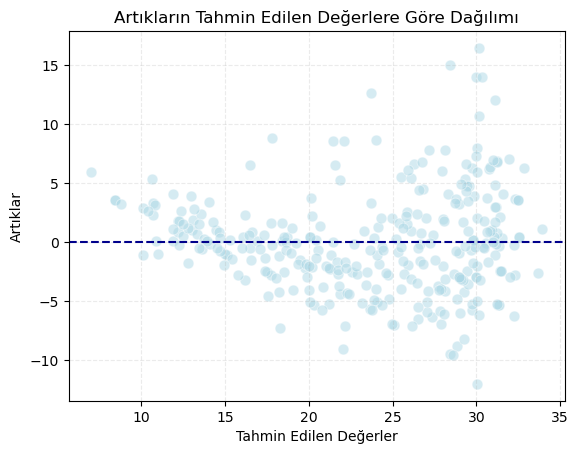

In [32]:
def plot_residuals_vs_fitted(fitted_values, residuals):
    sns.scatterplot(
        x=fitted_values, 
        y=residuals, 
        alpha=0.50, 
        color='lightblue', 
        s=60
    )
    
    plt.axhline(y=0, color='darkblue', linestyle='--')
    
    plt.title("Artıkların Tahmin Edilen Değerlere Göre Dağılımı", fontsize=12)
    plt.xlabel("Tahmin Edilen Değerler", fontsize=10)
    plt.ylabel("Artıklar", fontsize=10)
    
    plt.grid(True, linestyle='--', alpha=0.25)
    
    plt.show()

plot_residuals_vs_fitted(fitted_values, residuals)

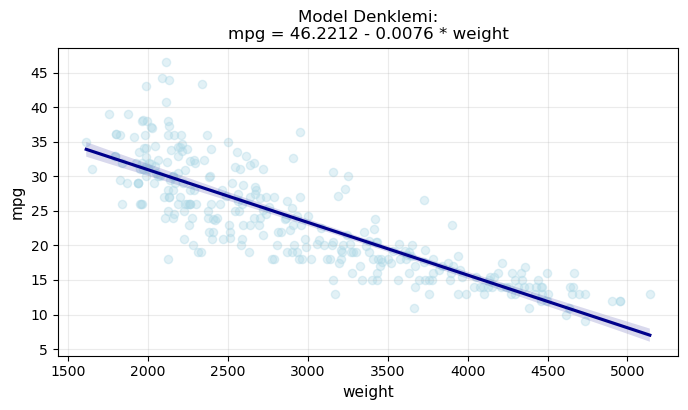

In [33]:
plt.figure(figsize=(8, 4))
reg_plot = sns.regplot(
    x=X_train_weight,
    y=y_train,
    ci=95,
    scatter_kws={"color": "lightblue", "s": 35, "alpha": 0.35},
    line_kws={"color": "darkblue"}
)

reg_plot.set_title(f"Model Denklemi:\nmpg = {intercept:.4f} - {abs(slope):.4f} * weight", fontsize=12)
reg_plot.set_xlabel("weight", fontsize=11)
reg_plot.set_ylabel("mpg", fontsize=11)
plt.grid(True, alpha=0.25) 
plt.show()

In [34]:
class TransformationError(Exception):
    pass

def apply_transformation(data, transformation_type): 
    data_array = np.asarray(data)
    
    if transformation_type == "Original":
        return data_array, None 
    elif transformation_type == "Log":
        if np.any(data_array <= 0):
            raise TransformationError("Log dönüşümü için pozitif değerler gerekir.")
        return np.log(data_array), None
    elif transformation_type == "Sqrt":
        if np.any(data_array < 0):
            raise TransformationError("Sqrt dönüşümü için negatif olmayan değerler gerekir.")
        return np.sqrt(data_array), None
    elif transformation_type == "Box-Cox":
        if np.any(data_array <= 0):
            raise TransformationError("Box-Cox dönüşümü için pozitif değerler gerekir.")
        result, lmbda = stats.boxcox(data_array)
        return result, lmbda
    elif transformation_type == "Reciprocal":
        if np.any(data_array == 0):
            raise TransformationError("Reciprocal dönüşümü için sıfır olmayan değerler gerekir.")
        return 1 / data_array, None
    elif transformation_type == "Square":
        return data_array**2, None
    else:
        raise ValueError(f"Bilinmeyen dönüşüm tipi: {transformation_type}")

transformation_types = ["Original", "Log", "Sqrt", "Reciprocal", "Box-Cox", "Square"]

X_array = np.array(X_train_weight)
y_array = np.array(y_train)

results = []
lambdas = {} 

for x_transform in transformation_types:
    for y_transform in transformation_types:
        try:
            x_trans_raw, lam_x = apply_transformation(X_array, x_transform)
            y_transformed, lam_y = apply_transformation(y_array, y_transform)

            if lam_x is not None:
                lambdas[f'{x_transform}_x'] = lam_x
            if lam_y is not None:
                lambdas[f'{y_transform}_y'] = lam_y

            x_transformed_const = sm.add_constant(x_trans_raw)
            model = sm.OLS(y_transformed, x_transformed_const).fit()
            residuals = model.resid
            
            r_squared = model.rsquared
            shapiro_stat, shapiro_p = shapiro(residuals)
            _, bp_p, _, _ = het_breuschpagan(residuals, x_transformed_const)

            results.append({
                'X Transformation': x_transform, 'Y Transformation': y_transform,  
                'R²': r_squared, 'Shapiro Wilk p': shapiro_p, 'Breusch-Pagan p': bp_p
            })
        
        except (TransformationError, ValueError) as e:
            print(f" Kombinasyon atlandı ('{x_transform}' -> '{y_transform}'): {e}")

print(f"Kullanılacak dönüşüm tipleri: {transformation_types}")
results_df = pd.DataFrame(results)
print(f"\nToplam {len(results_df)} kombinasyon test edildi.")

valid_results_df = results_df.dropna(subset=['R²']).copy()
print(f"Geçerli sonuç sayısı: {len(valid_results_df)}")

if not valid_results_df.empty:
    numeric_cols = ["R²", "Shapiro Wilk p", "Breusch-Pagan p"]
    valid_results_df[numeric_cols] = valid_results_df[numeric_cols].apply(pd.to_numeric)
    cols_to_show = ['X Transformation', 'Y Transformation', 'R²', 'Shapiro Wilk p', 'Breusch-Pagan p']

    def format_for_display(df):
        display_df = df.copy()
        for col in numeric_cols:
            display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
        return display_df

    both_assumptions_met = valid_results_df[
        (valid_results_df["Shapiro Wilk p"] > alpha) & 
        (valid_results_df["Breusch-Pagan p"] > alpha)
    ].sort_values(by="R²", ascending=False)

    if not both_assumptions_met.empty:
        print("\nA) Her iki varsayımı sağlayan ve en yüksek R² değerine sahip ilk 3 kombinasyon:")
        display_df = format_for_display(both_assumptions_met.head(3))
        print(tabulate(display_df[cols_to_show], headers='keys', tablefmt="pretty", showindex=False))
    
    else:
        print("\nB) Hiçbir kombinasyon her iki varsayımı da sağlayamadı.")

        normality_met = valid_results_df[
            valid_results_df["Shapiro Wilk p"] > alpha
        ].sort_values(by="R²", ascending=False)

        if not normality_met.empty:
            print("Sadece Normallik Varsayımını Sağlayan En İyi 3 Kombinasyon (R²'ye göre):")
            display_df = format_for_display(normality_met.head(3))
            print(tabulate(display_df[cols_to_show], headers='keys', tablefmt="pretty", showindex=False))
        else:
            print("Normallik varsayımını sağlayan hiçbir kombinasyon bulunamadı.")

        homoscedasticity_met = valid_results_df[
            valid_results_df["Breusch-Pagan p"] > alpha
        ].sort_values(by="R²", ascending=False)
        
        if not homoscedasticity_met.empty:
            print("\nSadece Sabit Varyanslılık Varsayımını Sağlayan En İyi 3 Kombinasyon (R²'ye göre):")
            display_df = format_for_display(homoscedasticity_met.head(3))
            print(tabulate(display_df[cols_to_show], headers='keys', tablefmt="pretty", showindex=False))
        else:
            print("Sabit varyanslılık varsayımını sağlayan hiçbir kombinasyon bulunamadı.")
            
    print("\nC) En yüksek R² değerine sahip ilk 3 kombinasyon (Varsayımlardan bağımsız):")
    top_r2_combos = valid_results_df.sort_values(by="R²", ascending=False).head(3)
    display_top_r2 = format_for_display(top_r2_combos)
    print(tabulate(display_top_r2[cols_to_show], headers='keys', tablefmt="pretty", showindex=False))

else:
    print("Hiçbir dönüşüm kombinasyonu başarıyla tamamlanamadı.")

Kullanılacak dönüşüm tipleri: ['Original', 'Log', 'Sqrt', 'Reciprocal', 'Box-Cox', 'Square']

Toplam 36 kombinasyon test edildi.
Geçerli sonuç sayısı: 36

A) Her iki varsayımı sağlayan ve en yüksek R² değerine sahip ilk 3 kombinasyon:
+------------------+------------------+--------+----------------+-----------------+
| X Transformation | Y Transformation |   R²   | Shapiro Wilk p | Breusch-Pagan p |
+------------------+------------------+--------+----------------+-----------------+
|       Sqrt       |       Log        | 0.7720 |     0.0593     |     0.1159      |
|     Original     |       Log        | 0.7703 |     0.1500     |     0.1254      |
|      Square      |       Log        | 0.7482 |     0.5553     |     0.3002      |
+------------------+------------------+--------+----------------+-----------------+

C) En yüksek R² değerine sahip ilk 3 kombinasyon (Varsayımlardan bağımsız):
+------------------+------------------+--------+----------------+-----------------+
| X Transformati

In [35]:
best_y_transform = 'Log'
lam_y = lambdas['Box-Cox_y'] 

In [36]:
X_train_transformed, _ = apply_transformation(X_train_weight, "Sqrt")
y_train_transformed, _ = apply_transformation(y_train, 'Log')

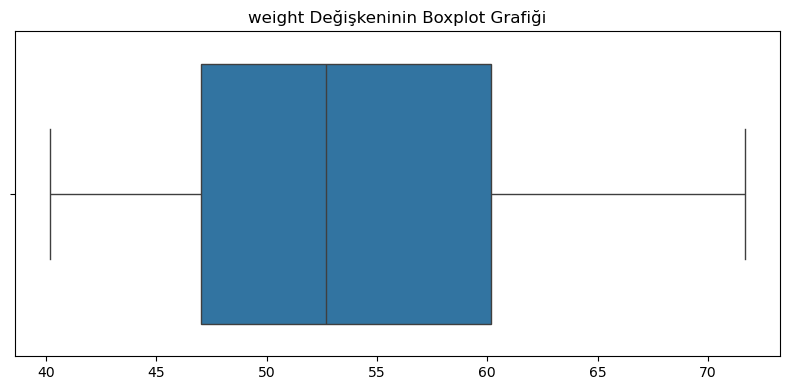

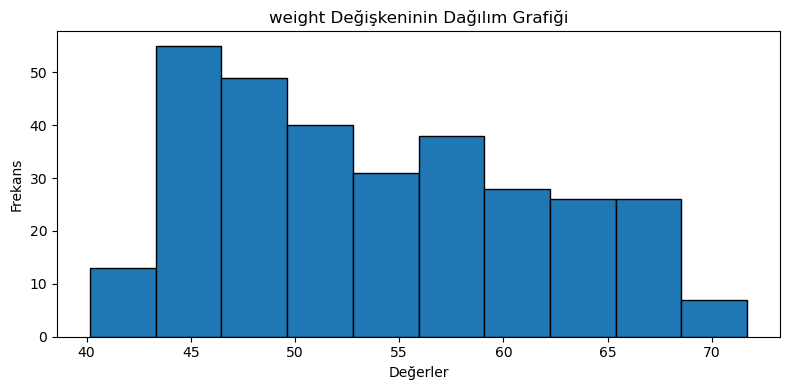

In [37]:
plot_variable_distribution(X_train_transformed, var_name="weight")

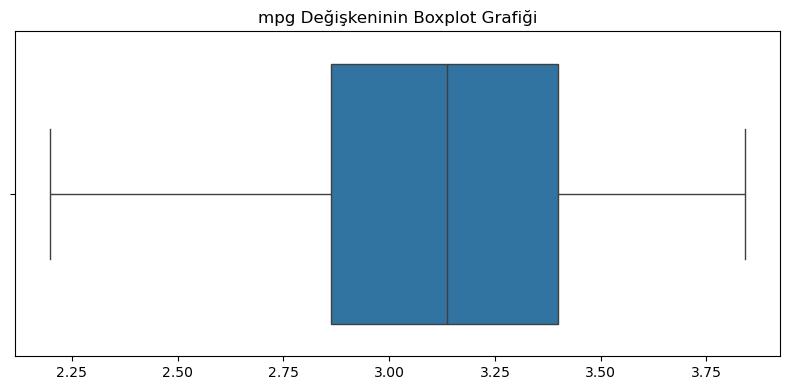

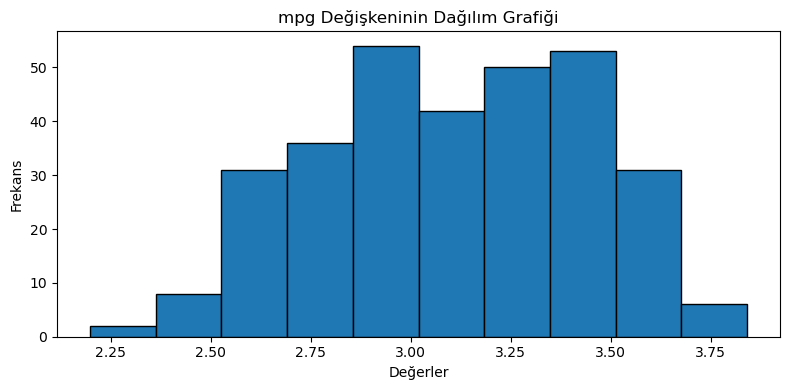

In [38]:
plot_variable_distribution(y_train_transformed, var_name="mpg")

In [39]:
X_train_transformed_const = sm.add_constant(X_train_transformed)
model_transformed = sm.OLS(y_train_transformed, X_train_transformed_const).fit()
model_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1053.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          7.24e-102
Time:                        00:16:11   Log-Likelihood:                 125.49
No. Observations:                 313   AIC:                            -247.0
Df Residuals:                     311   BIC:                            -239.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1896      0.065     80.021      0.000       5.062       5.317
x1            -0.0387      0.001    -32.454      0.000      -0.041      -0.036
==============================================================================
Omnibus:                        5.372   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                6.308
Skew:                           0.160   Prob(JB):                       0.0427
Kurtosis:                       3.617   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
intercept_transformed = model_transformed.params[0]
slope_transformed = model_transformed.params[1]

In [41]:
fitted_transformed = model_transformed.fittedvalues
resid_transformed = model_transformed.resid

In [42]:
def invert_predictions(predictions, transform_type, lmbda=None):
    print(f"Bağımlı değişken (y) için uygulanan dönüşüm: '{transform_type}'")
    
    if transform_type == 'Log':
        inverted_preds = np.exp(predictions)
        print("Ters dönüşüm olarak 'np.exp()' uygulandı.")
    elif transform_type == 'Sqrt':
        inverted_preds = np.square(predictions)
        print("Ters dönüşüm olarak 'np.square()' uygulandı.")
    elif transform_type == 'Box-Cox':
        if lmbda is None:
            raise ValueError("Box-Cox ters dönüşümü için lambda değeri gereklidir.")
        inverted_preds = inv_boxcox(predictions, lmbda)
        print(f"Ters dönüşüm olarak 'inv_boxcox()' (lambda={lmbda:.4f}) uygulandı.")
    elif transform_type == 'Reciprocal':
        inverted_preds = 1.0 / predictions
        print("Ters dönüşüm olarak '1/tahmin' uygulandı.")
    elif transform_type == 'Square':
        inverted_preds = np.sqrt(predictions)
        print("Ters dönüşüm olarak 'np.sqrt()' uygulandı.")
    elif transform_type == 'Original':
        inverted_preds = predictions
        print("Orijinal veri kullanıldığı için ters dönüşüm uygulanmadı.")
    else:
        raise ValueError(f"Bilinmeyen y dönüşüm tipi '{transform_type}' için ters dönüşüm tanımlanmamış.")
        
    print("Bu dönüşüme göre tahminler orijinal ölçeğe geri çevrildi.")
    return inverted_preds

In [43]:
lam_y_for_inversion = lambdas.get('Box-Cox_y') 
fitted_original_scale = invert_predictions(fitted_transformed, best_y_transform, lmbda=lam_y_for_inversion)

Bağımlı değişken (y) için uygulanan dönüşüm: 'Log'
Ters dönüşüm olarak 'np.exp()' uygulandı.
Bu dönüşüme göre tahminler orijinal ölçeğe geri çevrildi.


In [44]:
train_mae_final = mean_absolute_error(y_train, (fitted_original_scale))
print(train_mae_final)

3.0158337748188635


In [45]:
perform_and_print_assumption_tests(resid_transformed, X_train_transformed_const)


Shapiro-Wilk Testi: W İstatistiği = 0.99, p değeri = 0.05932
İstatistiksel olarak, artıkların normal dağıldığı anlamlı bir şekilde söylenebilir.

Breusch-Pagan Testi: p değeri = 0.11591
İstatistiksel olarak, artıkların sabit varyansa sahip olduğu anlamlı bir şekilde söylenebilir.


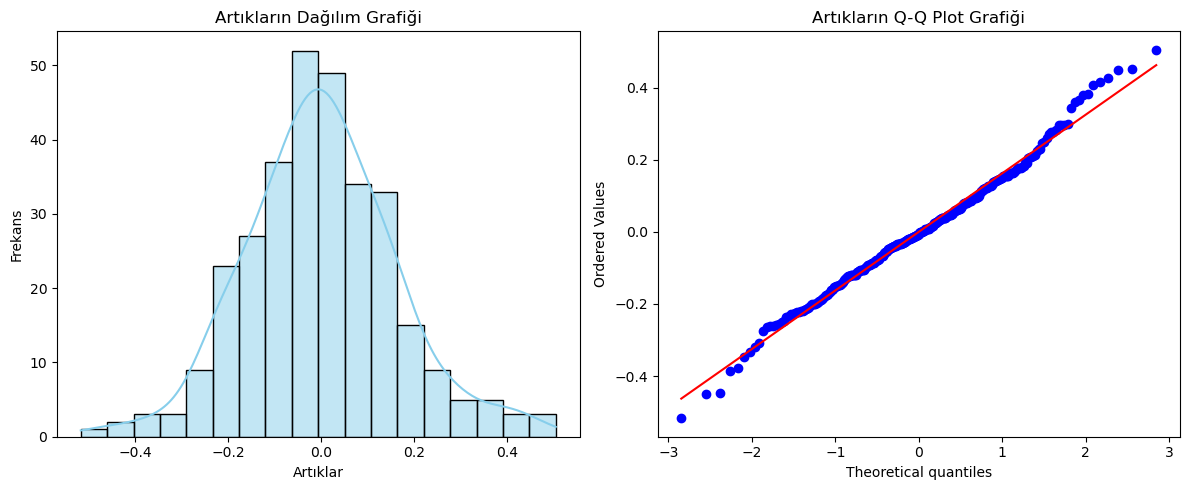

In [46]:
plot_residuals(resid_transformed)

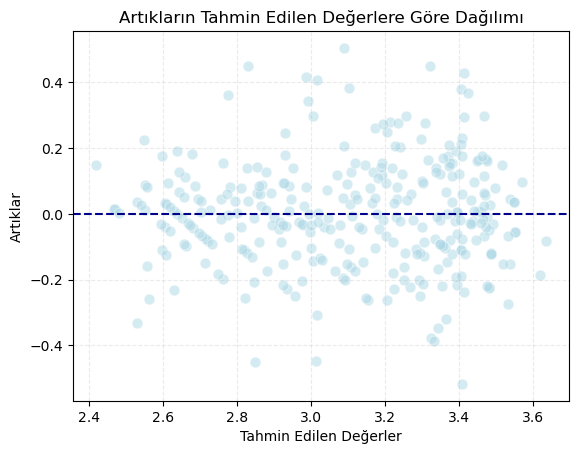

In [47]:
plot_residuals_vs_fitted(fitted_transformed, resid_transformed)

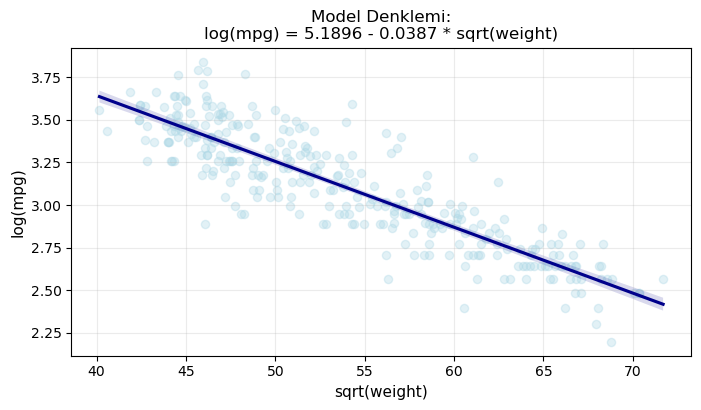

In [48]:
plt.figure(figsize=(8, 4))
reg_plot = sns.regplot(
    x=X_train_transformed,
    y=y_train_transformed,
    ci=95,
    scatter_kws={"color": "lightblue", "s": 35, "alpha": 0.35},
    line_kws={"color": "darkblue"}
)

sign = "+" if slope_transformed > 0 else "-"
equation = f"log(mpg) = {intercept_transformed:.4f} {sign} {abs(slope_transformed):.4f} * sqrt(weight)"
reg_plot.set_title(f"Model Denklemi:\n{equation}", fontsize=12)
reg_plot.set_xlabel("sqrt(weight)", fontsize=11)
reg_plot.set_ylabel("log(mpg)", fontsize=11) 
plt.grid(True, alpha=0.25) 
plt.show()

In [49]:
X_test_weight = X_test["weight"]

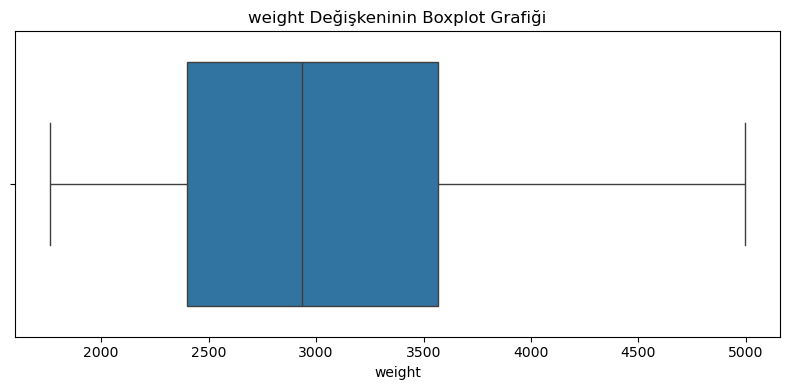

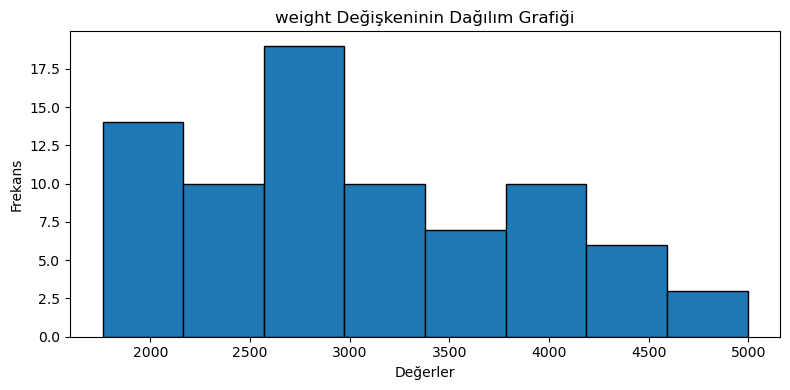

In [50]:
plot_variable_distribution(X_test_weight, var_name="weight")

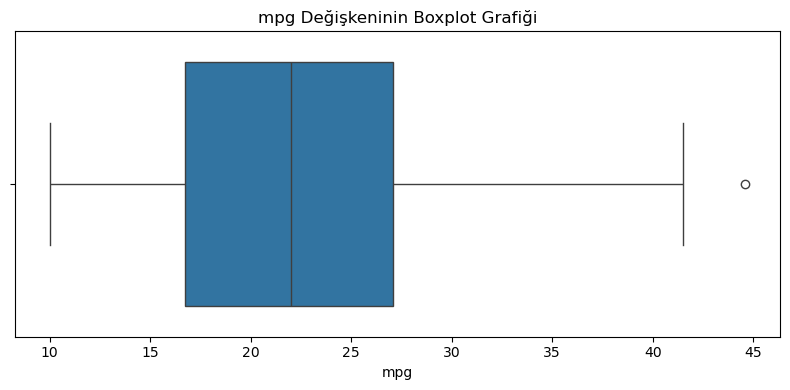

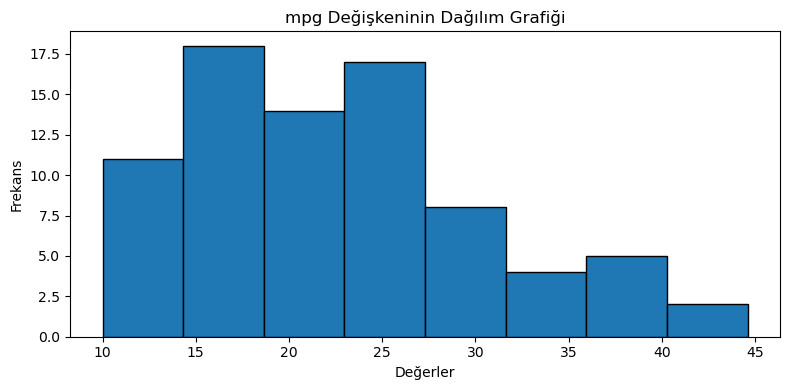

In [51]:
plot_variable_distribution(y_test, var_name="mpg")

In [52]:
X_test_transformed, _ = apply_transformation(X_test_weight, "Sqrt")

In [53]:
y_test_transformed, _ = apply_transformation(y_test, "Log")

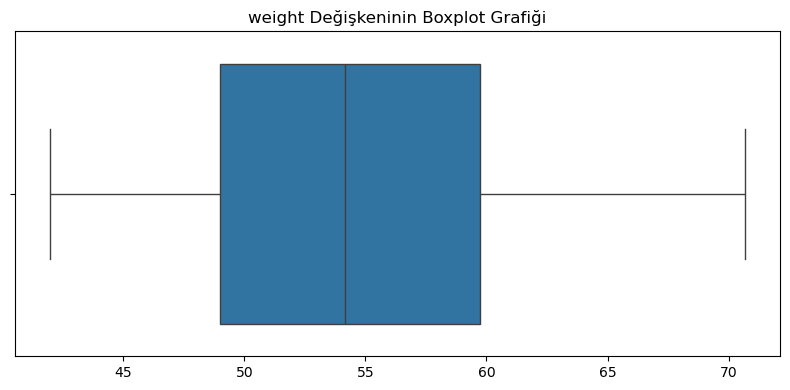

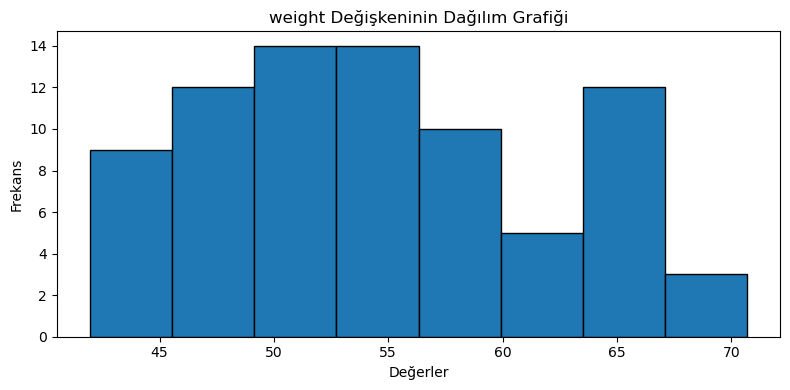

In [54]:
plot_variable_distribution(X_test_transformed, var_name="weight")

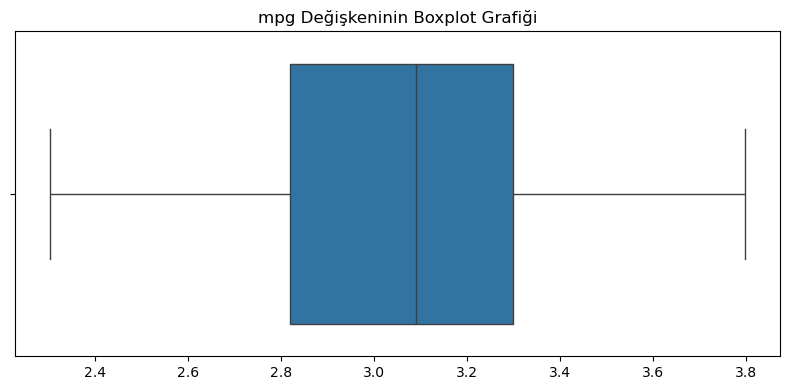

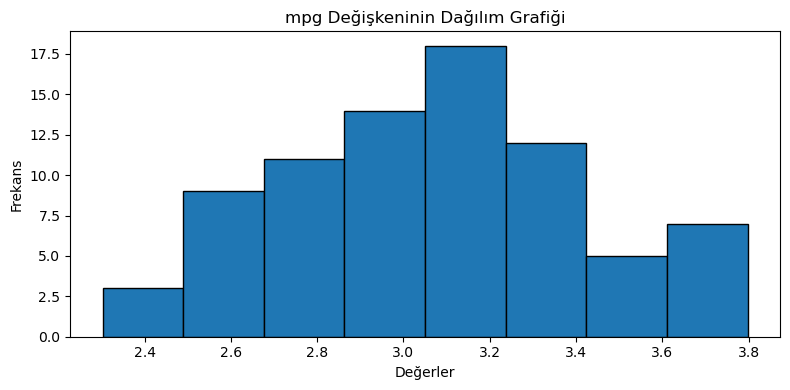

In [55]:
plot_variable_distribution(y_test_transformed, var_name="mpg")

In [56]:
X_test_transformed_const = sm.add_constant(X_test_transformed)
y_test_pred_transformed = model_transformed.predict(X_test_transformed_const)

In [57]:
test_resid = y_test_transformed - y_test_pred_transformed

In [58]:
y_test_pred_original_scale = invert_predictions(y_test_pred_transformed, best_y_transform, lmbda=lam_y_for_inversion)

Bağımlı değişken (y) için uygulanan dönüşüm: 'Log'
Ters dönüşüm olarak 'np.exp()' uygulandı.
Bu dönüşüme göre tahminler orijinal ölçeğe geri çevrildi.


In [59]:
test_r2 = r2_score(y_test, y_test_pred_original_scale)
print(test_r2)

0.6980826998089364


In [60]:
test_mae = mean_absolute_error(y_test, y_test_pred_original_scale)
print(test_mae)

3.088401211070723


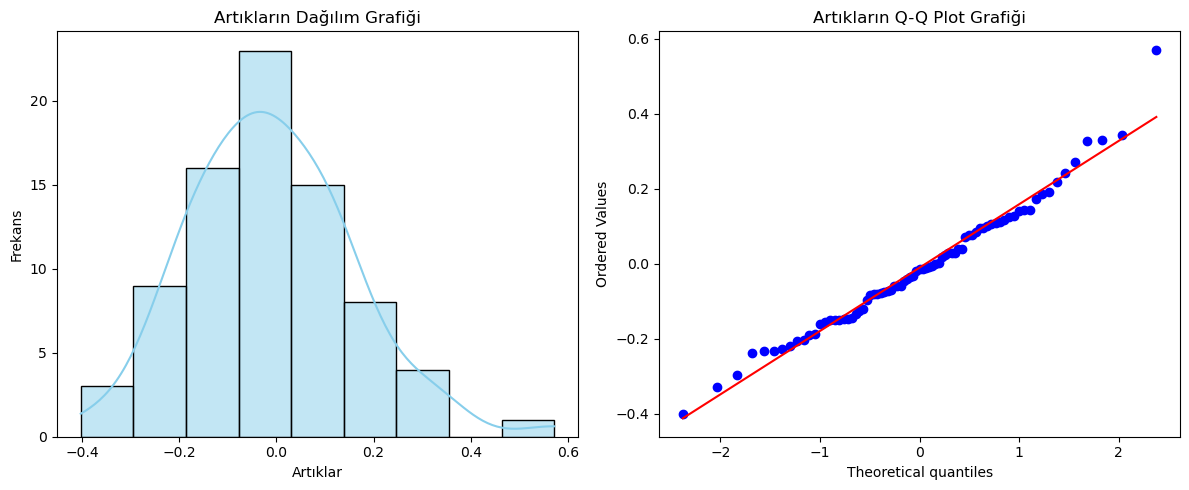

In [61]:
plot_residuals(test_resid)

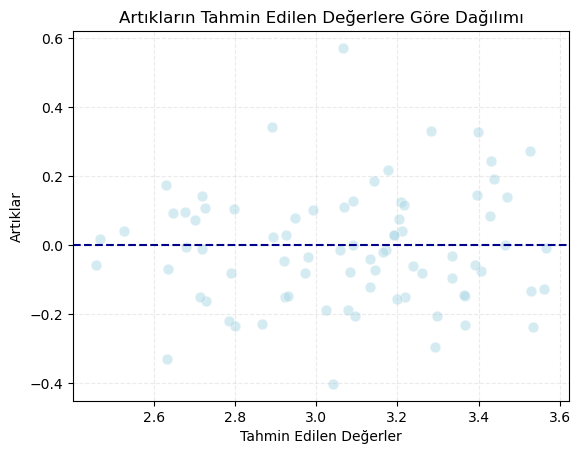

In [62]:
plot_residuals_vs_fitted(y_test_pred_transformed, test_resid)

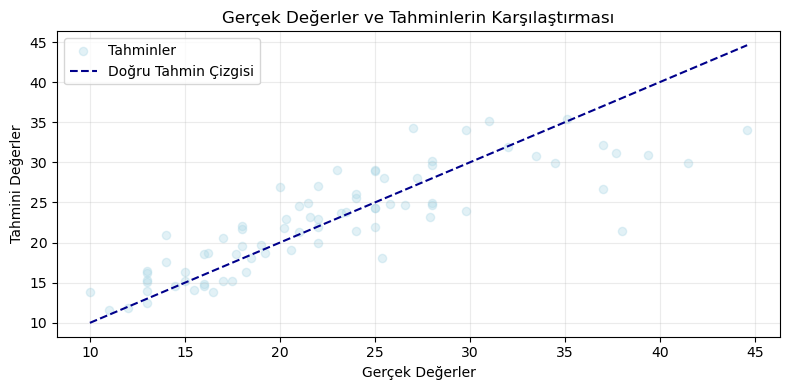

In [63]:
plt.figure(figsize=(8, 4))

plt.scatter(y_test, y_test_pred_original_scale, s=35, alpha=0.35, color='lightblue', label='Tahminler')

min_val = min(y_test.min(), y_test_pred_original_scale.min())
max_val = max(y_test.max(), y_test_pred_original_scale.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='darkblue', label='Doğru Tahmin Çizgisi')

plt.title('Gerçek Değerler ve Tahminlerin Karşılaştırması')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmini Değerler')
plt.legend()
plt.grid(True, alpha = 0.25)
plt.tight_layout()
plt.show()